# Latar Belakang
Sebuah perusahaan Supermarket sedang berusaha untuk memahami perilaku dan karakteristik pelanggan mereka agar dapat meningkatkan strategi pemasaran dan penjualan. Dengan memanfaatkan data pelanggan yang ada, perusahaan ingin melakukan analisis mendalam untuk mengidentifikasi tren dan pola yang dapat membantu dalam pengambilan keputusan bisnis. Data ini mencakup informasi demografi, aktivitas belanja, respon terhadap promosi, dan keluhan pelanggan.

## Rumusan Masalah
Berdasarkan latar belakang tersebut, beberapa pertanyaan kunci yang perlu dijawab melalui analisis data ini antara lain:
1. Bagaimana karakteristik demografi pelanggan?
2. Produk apa yang paling banyak dibeli oleh pelanggan dan bagaimana distribusi pembelian tersebut?
3. Seberapa efektif kampanye promosi yang dijalankan perusahaan?
4. Bagaimana pola pembelian pelanggan di berbagai kanal penjualan (website, katalog, toko fisik)?

# Data

Setelah merumuskan masalah, dilanjutkan dengan menganalisa dataset terlebih dahulu. Dataset yang digunakan adalah Supermarket Customers.csv

## Import Libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Melihat Jumlah Kolom dan Jumlah Value Dalam Kolom

In [2]:
# Menggunakan path dan nama dataset
df = pd.read_csv('/content/Supermarket Customers.csv', sep='\t')

# Menampilkan jumlah kolom dalam dataset
jumlah_kolom = len(df.columns)
print("Banyak kolom dalam dataset:", jumlah_kolom)

# Menampilkan jumlah value dalam setiap kolom
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Banyak kolom dalam dataset: 29
Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  Mn

## Penjelasan Kolom

Dataset Supermarket Customer berisi data demografis pengunjung, data diri pelanggan, data pembelian pelanggan, serta *behaviour* pelanggan yang disimpan dalam 29 kolom, yaitu:

1. ID: Identifier unik pelanggan
2. Year_Birth: Tahun lahir pelanggan
3. Education: Level pendidikan pelanggan
4. Marital_Status: Status pernikahan pelanggan
5. Income: Pendapatan rumahtangga pelanggan per tahun
6. Kidhome: Jumlah anak-anak dalam rumahtangga pelanggan
7. Teenhome: Jumlah remaja dalam rumahtangga pelanggan
8. Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan
9. Recency: Jumlah hari sejak pembelian terakhir pelanggan
10. MntWines: Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir
11. MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir
12. MntMeatProducts: Jumlah yang dibelanjakan untuk produk daging dalam 2 tahun terakhir
13. MntFishProducts: Jumlah yang dibelanjakan untuk produk ikan dalam 2 tahun terakhir
14. MntSweetProducts: Jumlah yang dibelanjakan untuk membeli produk makanan manis dalam 2 tahun terakhir
15. MntGoldProds: Jumlah yang dibelanjakan untuk membeli produk emas 2 tahun terakhir
16. NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
17. NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
18. NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
19. NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
20. NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir
21. AcceptedCmp3: 1 jika pelanggan menerima tawaran di kampanye ke-3, 0 sebaliknya
22. AcceptedCmp4: 1 jika pelanggan menerima tawaran di kampanye ke-4, 0 sebaliknya
23. AcceptedCmp5: 1 jika pelanggan menerima tawaran di kampanye ke-5, 0 sebaliknya
24. AcceptedCmp1: 1 jika pelanggan menerima tawaran di kampanye ke-1, 0 sebaliknya
25. AcceptedCmp2: 1 jika pelanggan menerima tawaran di kampanye ke-2, 0 sebaliknya
26. Complain: 1 jika pelanggan komplain dalam 2 tahun terakhir, 0 sebaliknya
27. Z_CostContact:(belum diketahui)
28. Z_Revenue:(belum diketahui)
29. Response: 1 jika pelanggan menerima tawaran pada kampanye terakhir, 0 sebaliknya

Berikut adalah sample dari 5 baris teratas dan 5 baris terbawah dataset Supermarket Customers.csv:

In [3]:
# Menggunakan path dan nama dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


## Melihat value unik pada setiap kolom

In [5]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Value Unik', 'Sampel Value Unik'], data=listItem)
display(tabel1Desc)

,Nama Kolom,Jumlah Value Unik,Sampel Value Unik
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 51

Dari data diatas kita dapat melihat bahwa:


*   Pada kolom "income" terdapat missing value.
*   Pada kolom "education" memiliki 2 value yang sebeneranya memiliki artian yang sama (2nd Cycle dan Master).
*   Value pada kolom martial_status memiliki 3 pasang value yang sama namun memiliki artian yang sama (Single dan Alone; Married dan Together; Divorced dan Widow) dan memiliki 2 anomali value (Absurd & YOLO)
*   Tipe data tanggal pada Dt_Customer masih berupa string
*   Tidak adanya penjelasan mengenai apa yang dimaksud dengan kolom Z_CostContact dan Z_Revenue





## Menyamakan Value dan Menghilangkan Value Anomali

In [6]:
# Mengubah nilai '2nd Cycle' menjadi 'Master' pada kolom Education karena sama
df['Education'] = df['Education'].replace('2n Cycle', 'Master')

# Verifikasi perubahan
print(df['Education'].unique())

['Graduation' 'PhD' 'Master' 'Basic']


In [8]:
# Konversi kolom Dt_Customer ke format datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

print(df['Dt_Customer'].head())

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


In [9]:
# Ganti nilai pada kolom Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Together': 'Married',
    'Widow': 'Divorced'
})

print(df['Marital_Status'].unique())

['Single' 'Married' 'Divorced' 'Absurd' 'YOLO']


In [10]:
# Menampilkan baris yang memiliki nilai 'YOLO' dan 'Absurd' pada kolom 'marital_status'
anomali_yolo = df[df['Marital_Status'] == 'YOLO']
anomali_absurd = df[df['Marital_Status'] == 'Absurd']

print("Baris dengan nilai 'YOLO':")
print(anomali_yolo)

print("\nBaris dengan nilai 'Absurd':")
print(anomali_absurd)

print(df['Marital_Status'].unique())

Baris dengan nilai 'YOLO':
         ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
2177  492    1973        PhD       YOLO           48432.0  0        1          
2202  11133  1973        PhD       YOLO           48432.0  0        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2177 2012-10-18   3        322       3          50                
2202 2012-10-18   3        322       3          50                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2177  4                3                 42            5                   
2202  4                3                 42            5                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2177  7                1                    6                   
2202  7                1                    6                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2177  8                  0          

Masih ada value yang tidak sesuai "YOLO" dan "Absurd". Dengan asumsi sudah memiliki "Teenhome" berjumlah 1 pada masing - masing baris, maka value yang tidak sesuai akan diubah menjadi Married.

In [11]:
# Mengganti nilai 'YOLO' dan 'Absurd' pada kolom 'marital_status'
df['Marital_Status'] = df['Marital_Status'].replace({'YOLO': 'Married', 'Absurd': 'Married'})

# Verifikasi penggantian nilai
print("Nilai unik dalam kolom 'Marital_Status' setelah penggantian:")

print(df['Marital_Status'].unique())

Nilai unik dalam kolom 'Marital_Status' setelah penggantian:
['Single' 'Married' 'Divorced']


## Mencari Korelasi antara Z_Revenue, Z_CostContact dengan Kolom Lain

In [12]:
# Menghitung korelasi antara Z_Revenue, Z_CostContact dengan kolom lain
# Mengabaikan kolom non-numerik
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print("Korelasi antara Z_Revenue, Z_CostContact dengan kolom lain")
print(correlation_matrix[['Z_Revenue', 'Z_CostContact']])

Korelasi antara Z_Revenue, Z_CostContact dengan kolom lain
                     Z_Revenue  Z_CostContact
ID                  NaN        NaN           
Year_Birth          NaN        NaN           
Income              NaN        NaN           
Kidhome             NaN        NaN           
Teenhome            NaN        NaN           
Recency             NaN        NaN           
MntWines            NaN        NaN           
MntFruits           NaN        NaN           
MntMeatProducts     NaN        NaN           
MntFishProducts     NaN        NaN           
MntSweetProducts    NaN        NaN           
MntGoldProds        NaN        NaN           
NumDealsPurchases   NaN        NaN           
NumWebPurchases     NaN        NaN           
NumCatalogPurchases NaN        NaN           
NumStorePurchases   NaN        NaN           
NumWebVisitsMonth   NaN        NaN           
AcceptedCmp3        NaN        NaN           
AcceptedCmp4        NaN        NaN           
AcceptedCmp5        N

## Missing Value Handling

In [13]:
# persentase dan jumlah missing value di tiap kolom
missing_value_count = df.isnull().sum()
missing_value_percentage = df.isna().sum()/df.shape[0]*100

print(f'Baris yang memiliki value kosong: \n {missing_value_count}\n')
print(f'Persentase missing value di tiap kolom: \n {missing_value_percentage}\n')

Baris yang memiliki value kosong: 
 ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

Persentase missing value di tiap kolom: 
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.0

Dari hasil diatas ditemukan bahwa 24 value pada income tidak memiliki nilai atau NaN dan missing value tersebut hanya kurang lebih 1% saja dari total data.

<Axes: >

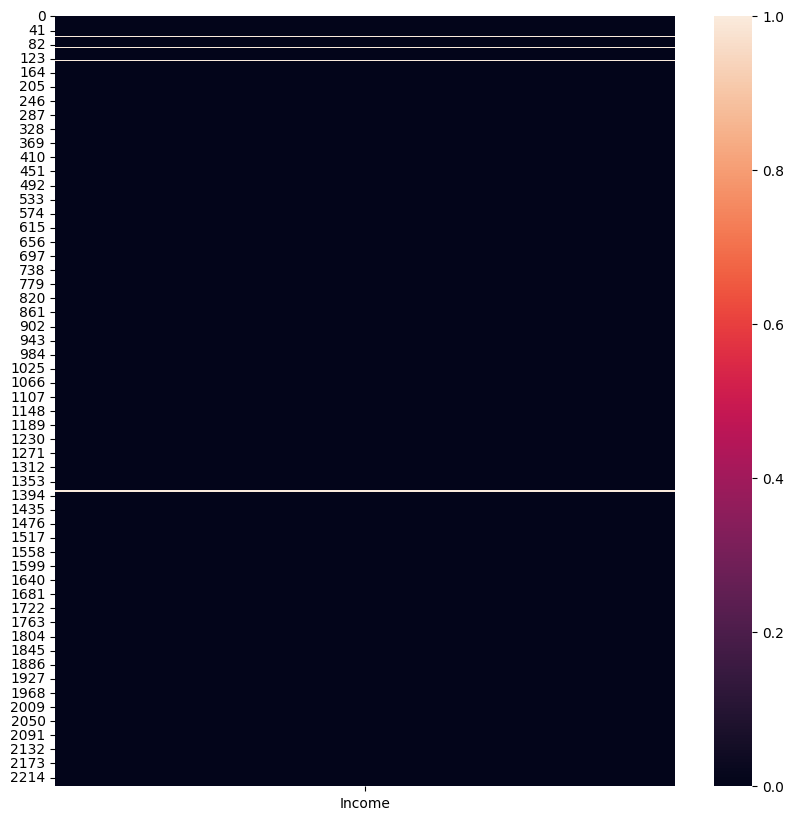

In [14]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Income']].isna())

In [15]:
# Tampilkan baris yang missing value
missing_value = df[df.isnull().any(axis=1)]
print(missing_value)

         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10    1994   1983        Graduation  Married       NaN      1        0          
27    5255   1986        Graduation  Single        NaN      1        0          
43    7281   1959        PhD         Single        NaN      0        0          
48    7244   1951        Graduation  Single        NaN      2        1          
58    8557   1982        Graduation  Single        NaN      1        0          
71    10629  1973        Master      Married       NaN      1        0          
90    8996   1957        PhD         Married       NaN      2        1          
91    9235   1957        Graduation  Single        NaN      1        1          
92    5798   1973        Master      Married       NaN      0        0          
128   8268   1961        PhD         Married       NaN      0        1          
133   1295   1963        Graduation  Married       NaN      0        1          
312   2437   1989        Gra

In [16]:
# Tampilkan statistik deskriptif kolom Income
print(df['Income'].describe())

count    2216.000000  
mean     52247.251354 
std      25173.076661 
min      1730.000000  
25%      35303.000000 
50%      51381.500000 
75%      68522.000000 
max      666666.000000
Name: Income, dtype: float64


In [17]:
# Menggunakan nilai median dari kolom Income berdasarkan Education level
df['Income'] = df.groupby('Education')['Income'].transform(lambda x: x.fillna(x.median()))
jumlah_missing_value = df['Income'].isna().sum()
print(f'Jumlah missing value setelah diproses: {jumlah_missing_value}')

Jumlah missing value setelah diproses: 0


# Clean Data

Setelah melakukan data cleaning maka selanjutnya kita akan mulai menganalisa dari dataset yang sudah bersih

In [18]:
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates()
    sample_size = min(2, unique_values.shape[0])
    sample = unique_values.sample(sample_size).values.tolist()

    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                     df[col].nunique(), sample])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)

print(df.shape)
print(dfDesc)

(2240, 29)
           dataFeatures        dataType  null  unique  \
0   ID                   int64           0     2240     
1   Year_Birth           int64           0     59       
2   Education            object          0     4        
3   Marital_Status       object          0     3        
4   Income               float64         0     1975     
5   Kidhome              int64           0     3        
6   Teenhome             int64           0     3        
7   Dt_Customer          datetime64[ns]  0     663      
8   Recency              int64           0     100      
9   MntWines             int64           0     776      
10  MntFruits            int64           0     158      
11  MntMeatProducts      int64           0     558      
12  MntFishProducts      int64           0     182      
13  MntSweetProducts     int64           0     177      
14  MntGoldProds         int64           0     213      
15  NumDealsPurchases    int64           0     15       
16  NumWebPurchases 

## Karakteristik Demografi Pelanggan

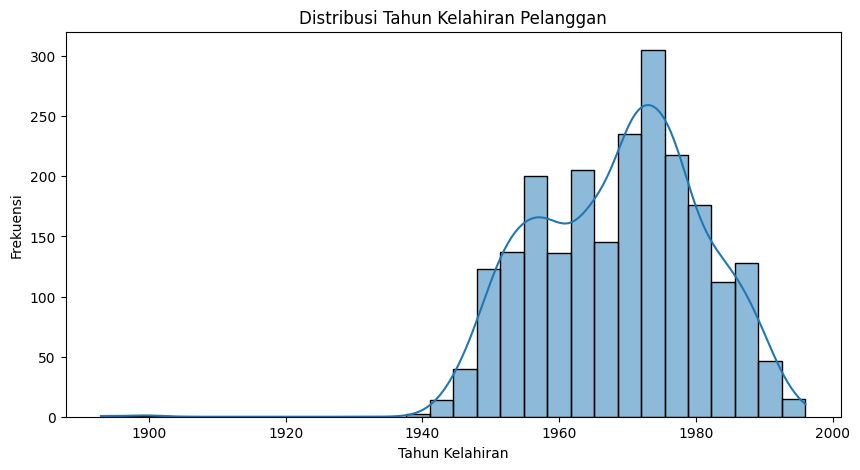

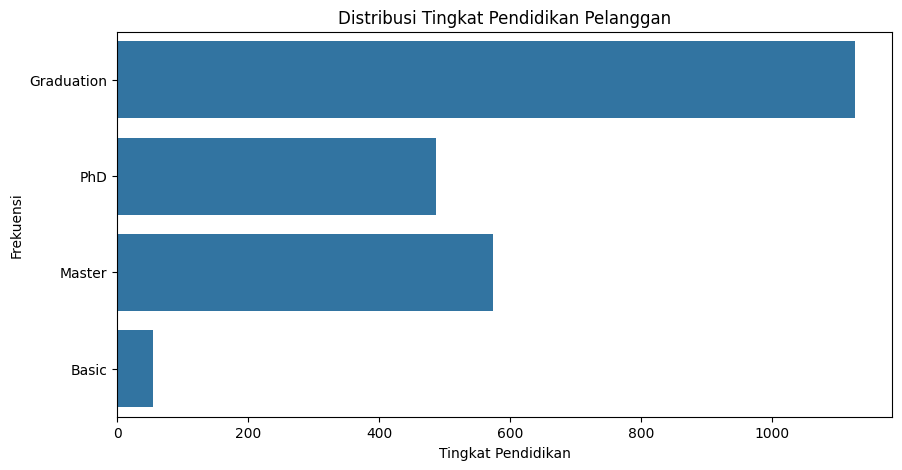

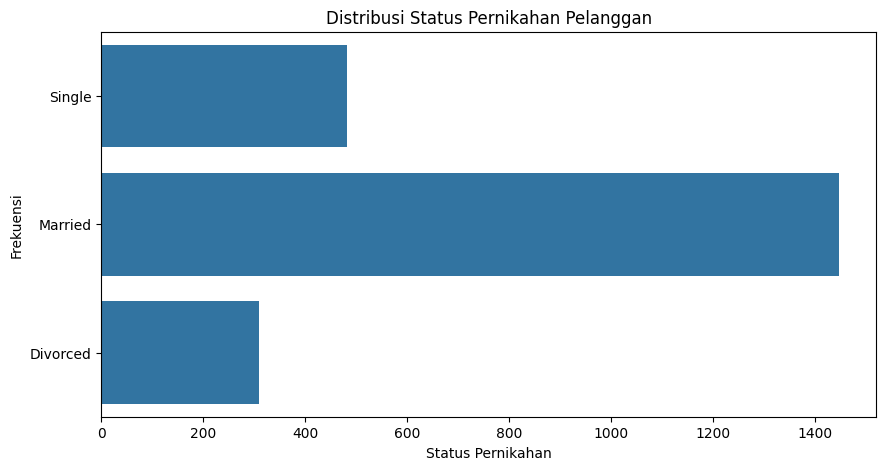

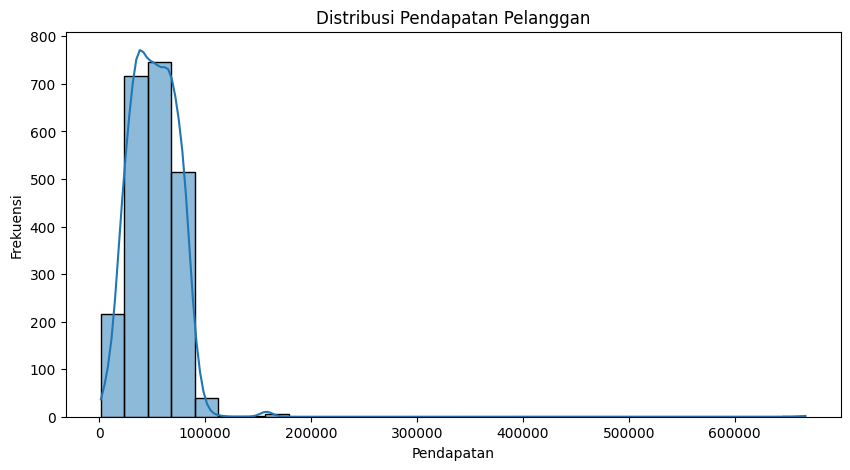

In [29]:
# Plot distribusi umur pelanggan
plt.figure(figsize=(10, 5))
sns.histplot(df['Year_Birth'], kde=True, bins=30)
plt.title('Distribusi Tahun Kelahiran Pelanggan')
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Frekuensi')
plt.show()

# Plot distribusi tingkat pendidikan pelanggan
plt.figure(figsize=(10, 5))
sns.countplot(df['Education'])
plt.title('Distribusi Tingkat Pendidikan Pelanggan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Frekuensi')
plt.show()

# Plot distribusi status pernikahan pelanggan
plt.figure(figsize=(10, 5))
sns.countplot(df['Marital_Status'])
plt.title('Distribusi Status Pernikahan Pelanggan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Frekuensi')
plt.show()

# Plot distribusi pendapatan pelanggan
plt.figure(figsize=(10, 5))
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.show()

**Distribusi Tahun Kelahiran**

Grafik menunjukkan jumlah pelanggan berdasarkan tahun kelahiran. Distribusi ini membantu kita memahami rentang usia dari pelanggan:

- Rentang Usia Utama: Pelanggan sebagian besar lahir antara tahun 1950 dan 1980.
- Puncak Usia: Puncak pelanggan berada di sekitar tahun 1970-an, menunjukkan bahwa sebagian besar pelanggan berada di usia antara 40-60 tahun.

**Distribusi Tingkat Pendidikan**

Grafik bar menampilkan distribusi tingkat pendidikan pelanggan:

- Mayoritas Pelanggan: Pelanggan sebagian besar memiliki tingkat pendidikan 'Master', diikuti oleh 'Graduation' dan 'PhD'.
- Sedikit Pelanggan: Tingkat pendidikan 'Basic' memiliki jumlah pelanggan yang paling sedikit.

**Distribusi Status Pernikahan**

Grafik bar menampilkan status pernikahan pelanggan:

- Mayoritas Pelanggan: Sebagian besar pelanggan memiliki status pernikahan 'Married'.
- Minoritas Pelanggan: Status pernikahan 'Single' dan 'Divorced' memiliki jumlah pelanggan yang lebih sedikit.

**Distribusi Pendapatan**

Histogram menampilkan distribusi pendapatan pelanggan:

- Rentang Pendapatan Utama: Sebagian besar pendapatan pelanggan berkisar antara 20,000 hingga 80,000.
- Puncak Pendapatan: Puncak pendapatan berada di sekitar 50,000 hingga 60,000.

**Distribusi Jumlah Anak-anak dan Remaja**

Grafik bar menampilkan jumlah anak-anak dan remaja dalam rumah tangga pelanggan:

- Mayoritas Pelanggan: Sebagian besar pelanggan memiliki 0-1 anak dan remaja di rumah mereka.

## Produk yang Paling Banyak Dibeli oleh Pelanggan

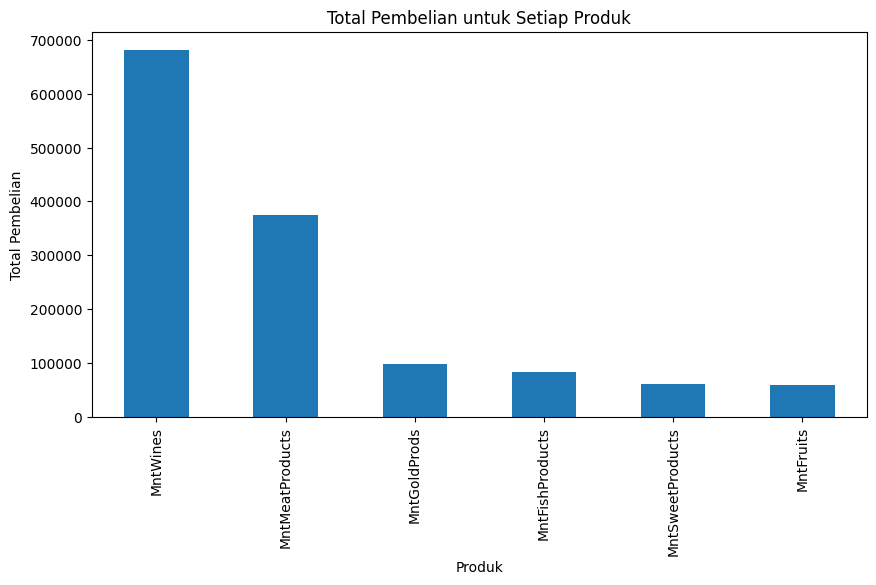

In [22]:
# Menghitung total pembelian untuk setiap produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_purchases = df[product_columns].sum().sort_values(ascending=False)

# Plot total pembelian untuk setiap produk
plt.figure(figsize=(10, 5))
total_purchases.plot(kind='bar')
plt.title('Total Pembelian untuk Setiap Produk')
plt.xlabel('Produk')
plt.ylabel('Total Pembelian')
plt.show()

Grafik bar menunjukkan jumlah pembelian untuk berbagai produk:

- Produk Terpopuler: Wine adalah produk yang paling banyak dibeli oleh pelanggan.
- Produk Lainnya: Produk daging juga populer, diikuti oleh produk emas dan produk manis.
- Produk Kurang Populer: Produk buah dan produk ikan memiliki jumlah pembelian yang lebih

## Efektivitas Kampanye Promosi

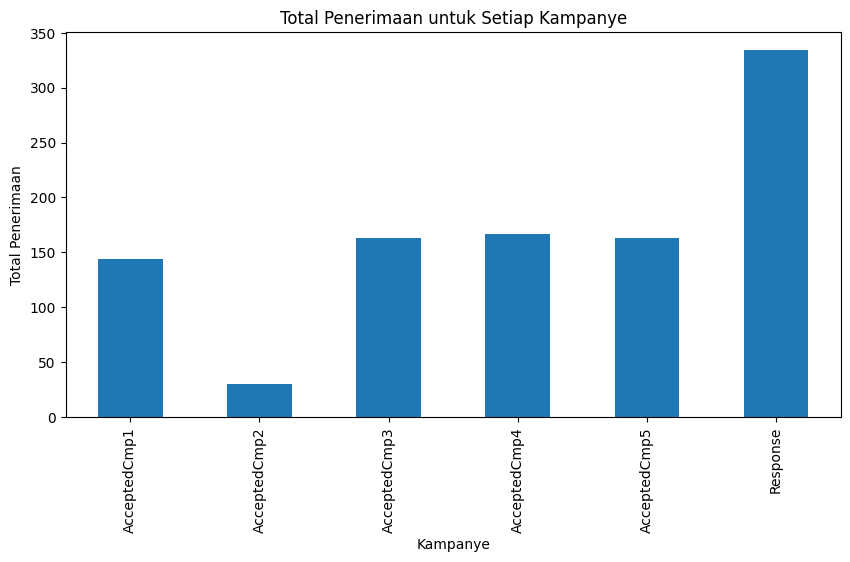

In [24]:
# Menghitung total penerimaan untuk setiap kampanye
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
total_accepted = df[campaign_columns].sum()

# Plot total penerimaan untuk setiap kampanye
plt.figure(figsize=(10, 5))
total_accepted.plot(kind='bar')
plt.title('Total Penerimaan untuk Setiap Kampanye')
plt.xlabel('Kampanye')
plt.ylabel('Total Penerimaan')
plt.show()


Grafik bar menunjukkan jumlah penerimaan tawaran pada berbagai kampanye promosi:

- Kampanye yang Efektif: Kampanye ke-3 dan ke-4 memiliki tingkat penerimaan tertinggi.
- Kampanye yang Kurang Efektif: Kampanye ke-1 dan ke-5 memiliki tingkat penerimaan yang lebih rendah.
- Respon Umum: Tingkat penerimaan pada kampanye terakhir menunjukkan efektivitas yang lebih tinggi dibandingkan kampanye sebelumnya.

## Pola Pembelian Pelanggan di Berbagai Kanal Penjualan

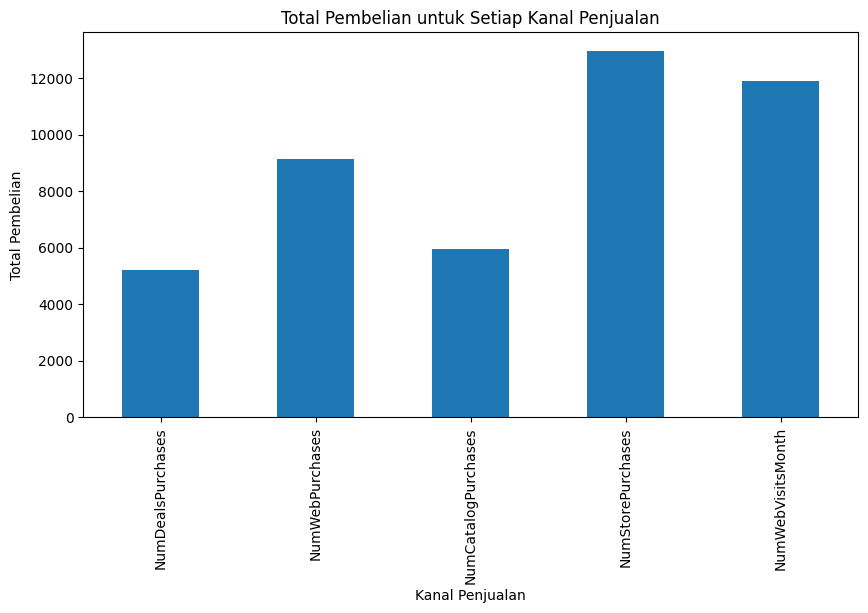

In [25]:
# Menghitung total pembelian untuk setiap kanal penjualan
channel_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
total_channel_purchases = df[channel_columns].sum()

# Plot total pembelian untuk setiap kanal penjualan
plt.figure(figsize=(10, 5))
total_channel_purchases.plot(kind='bar')
plt.title('Total Pembelian untuk Setiap Kanal Penjualan')
plt.xlabel('Kanal Penjualan')
plt.ylabel('Total Pembelian')
plt.show()


Grafik bar menunjukkan jumlah pembelian di berbagai kanal penjualan:

- Kanal Populer: Toko fisik adalah kanal yang paling banyak digunakan untuk pembelian.
- Kanal Online: Pembelian melalui website dan katalog juga signifikan, tetapi tidak sebanyak toko fisik.
- Pembelian Diskon: Pembelian dengan diskon lebih rendah dibandingkan kanal lainnya.

#Saran

1. Segmentasi Pelanggan Berdasarkan Usia

  Fokuskan kampanye pemasaran pada kelompok usia 40-60 tahun, yang merupakan mayoritas pelanggan kita. Buat penawaran yang relevan dan menarik untuk segmen ini. Pertimbangkan untuk mengembangkan atau mempromosikan produk yang lebih menarik bagi kelompok usia ini.

2. Optimalisasi Penjualan Produk

  Mengingat wine adalah produk yang paling populer, tingkatkan promosi dan penawaran khusus untuk wine. Mungkin termasuk diskon volume atau penawaran bundel. Untuk produk yang kurang populer seperti buah dan ikan, pertimbangkan untuk melakukan kampanye kesadaran produk atau menyesuaikan harga untuk meningkatkan penjualan.

3. Efektivitas Kampanye Promosi

  Kampanye ke-3 dan ke-4 lebih efektif. Analisis elemen-elemen dari kampanye ini untuk memahami apa yang membuat mereka sukses dan terapkan strategi serupa untuk kampanye mendatang.

4. Pola Pembelian di Berbagai Kanal
  Meskipun toko fisik adalah kanal utama, penting untuk meningkatkan pengalaman pembelian online. Investasikan dalam pengembangan website dan katalog yang lebih interaktif dan mudah digunakan. Perkenalkan program loyalitas dan lebih banyak penawaran diskon untuk mendorong pembelian melalui website dan katalog.


In [30]:
# Menyimpan dataframe ke file CSV
df.to_csv('/content/Supermarket_Customers_Processed.csv', index=False)